# Palmer Penguins

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
zip_file_path = 'Palmer Penguins Dataset.zip'  # Update with the correct path
extracted_folder = 'Palmer_Penguins_Data/'  # Folder to extract the files

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Path to the CSV file
penguins_size_file = extracted_folder + 'penguins_size.csv'

penguins_data = pd.read_csv(penguins_size_file)

print("First few rows of the dataset:")
print(penguins_data.head())

print("\nColumns in the dataset:")
print(penguins_data.columns)

print("\nData types of the dataset:")
print(penguins_data.dtypes)

print("\nMissing values in the dataset:")
print(penguins_data.isnull().sum())

print("\nData Summary:")
print(penguins_data.describe())

First few rows of the dataset:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Columns in the dataset:
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Data types of the dataset:
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g 

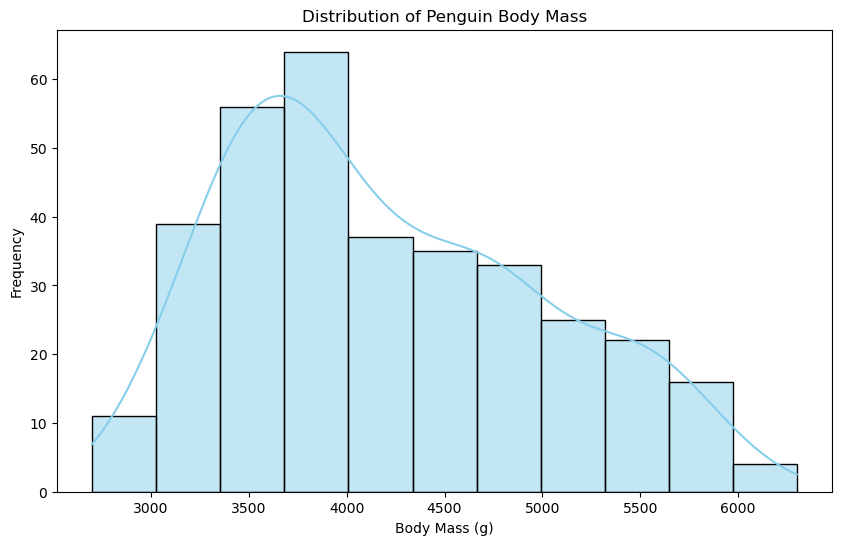

C:\Users\milto\AppData\Local\Temp\ipykernel_17908\496931719.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=penguins_data, palette='Set2')


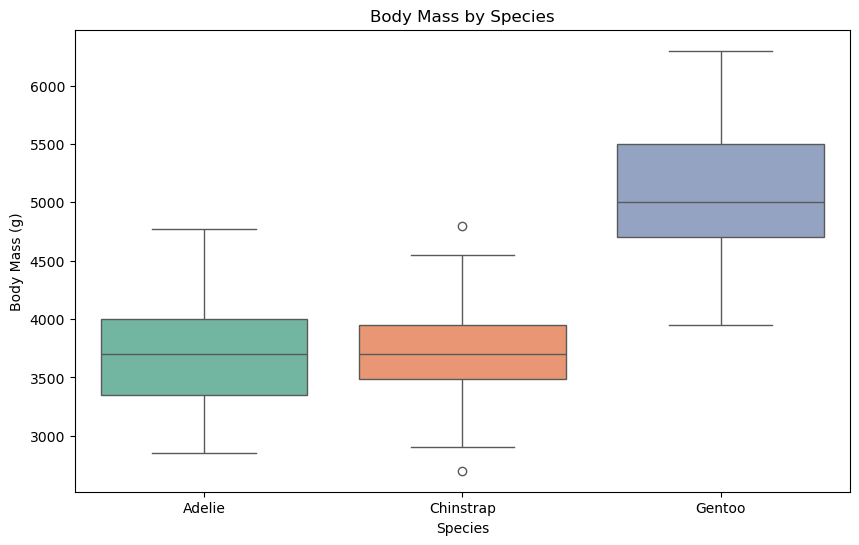

In [3]:
# Step 7: Visualize the distribution of numerical variables (e.g., body mass)
plt.figure(figsize=(10, 6))
sns.histplot(penguins_data['body_mass_g'], kde=True, color='skyblue')
plt.title('Distribution of Penguin Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

# Step 8: Boxplot of body mass by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins_data, palette='Set2')
plt.title('Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()


Correlation matrix:
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


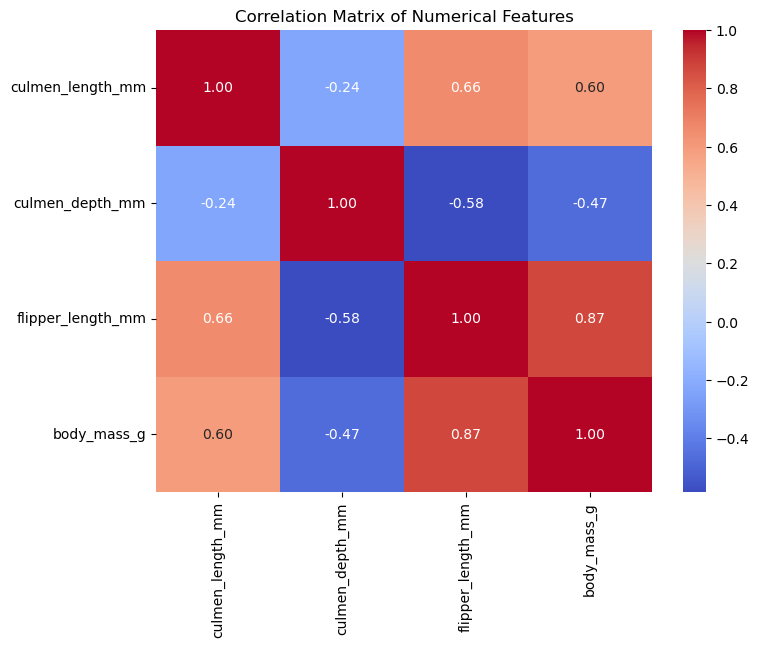

C:\Users\milto\AppData\Local\Temp\ipykernel_17908\2011732452.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='body_mass_g', data=penguins_data, palette='Set1')


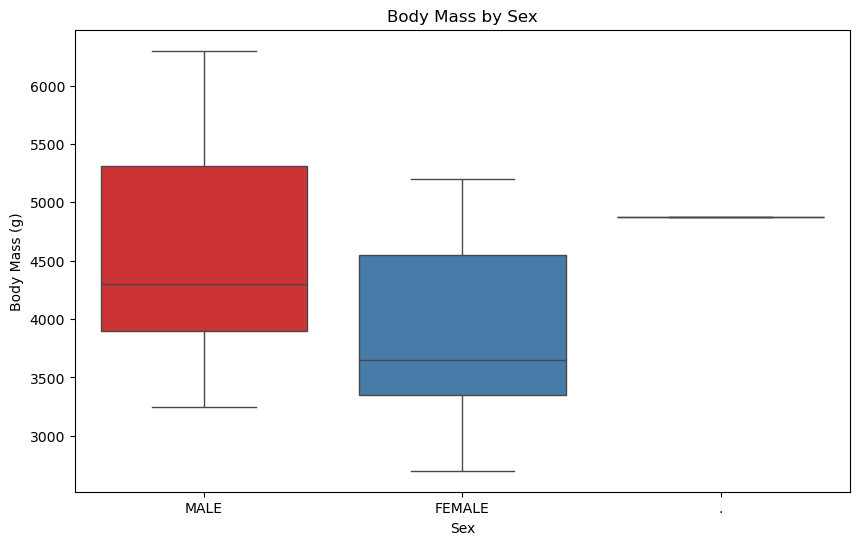

In [4]:
# Step 9: Correlation between numerical features (e.g., culmen length, flipper length, body mass)
correlation = penguins_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
print("\nCorrelation matrix:")
print(correlation)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 10: Explore relationships between categorical and numerical variables
# For example, body mass by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='body_mass_g', data=penguins_data, palette='Set1')
plt.title('Body Mass by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.show()

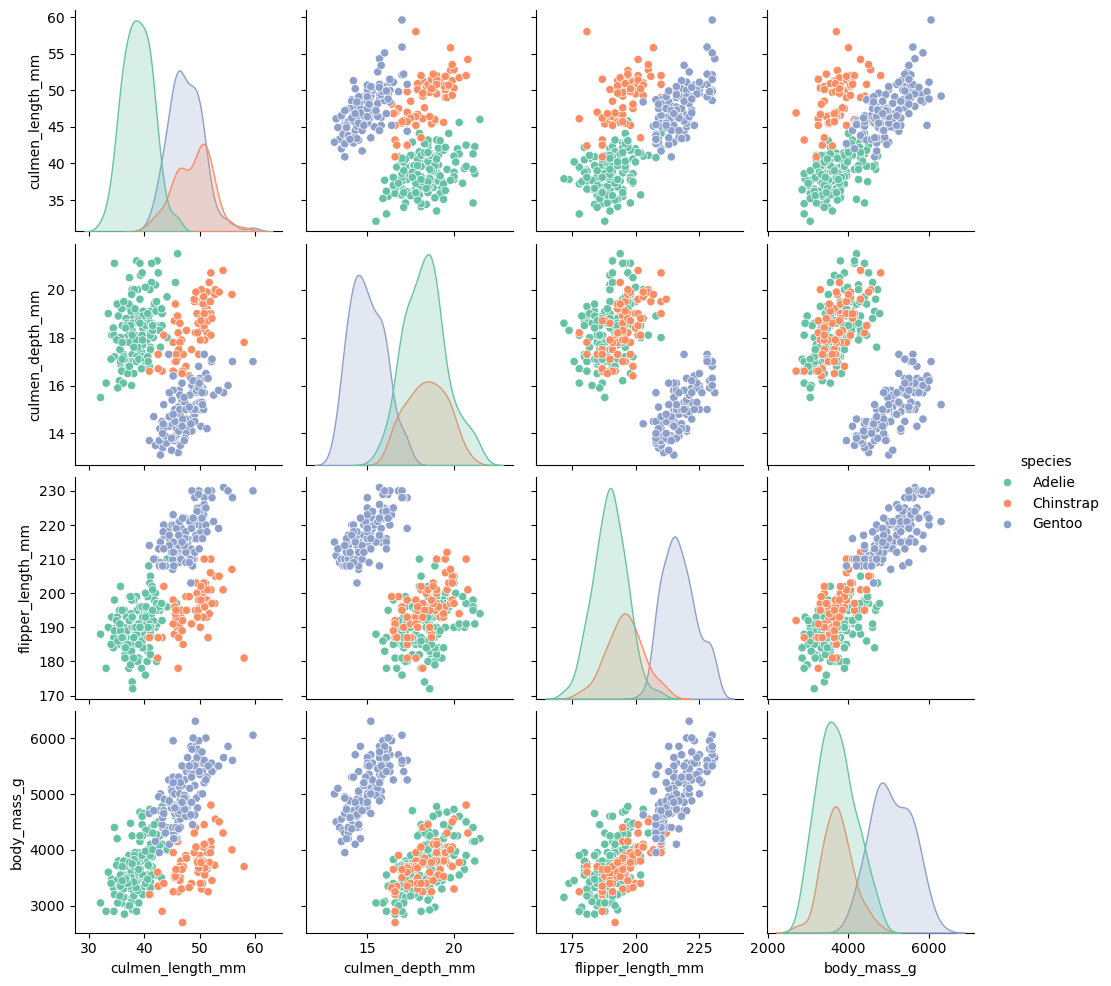


Species distribution across islands:
     species     island  counts
0     Adelie     Biscoe      44
1     Adelie      Dream      56
2     Adelie  Torgersen      52
3  Chinstrap      Dream      68
4     Gentoo     Biscoe     124


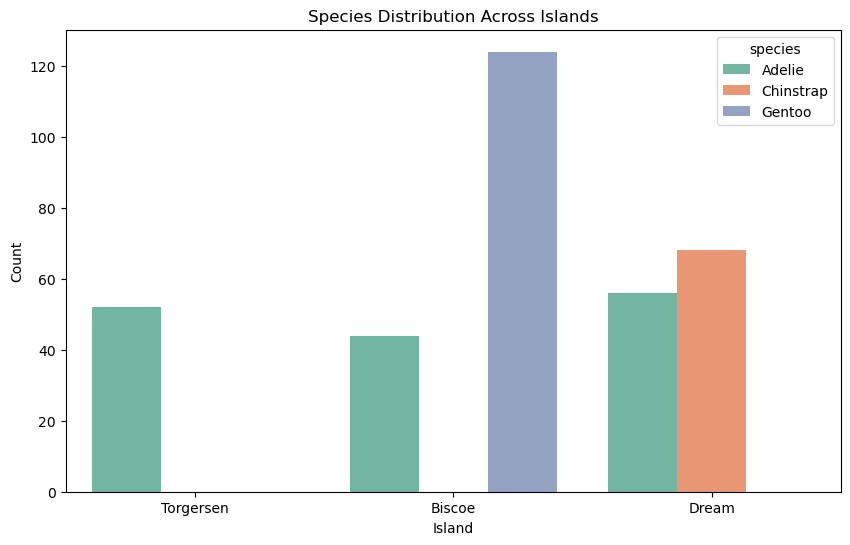

In [5]:
# Step 11: Pairplot to explore relationships between variables
sns.pairplot(penguins_data, hue='species', palette='Set2')
plt.show()

# Step 12: Check for species distribution across different islands
species_island_counts = penguins_data.groupby(['species', 'island']).size().reset_index(name='counts')
print("\nSpecies distribution across islands:")
print(species_island_counts)

# Step 13: Visualize species distribution across islands
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species', data=penguins_data, palette='Set2')
plt.title('Species Distribution Across Islands')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()
